<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging
import io

warnings.filterwarnings('ignore')

baseurl = 'https://d7f2c3211135.ngrok.io';

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
q = '\
[d]H.0 * 0.99 > [d]MAXH20.1 \n\
AND [d]C.0 < [d]O.0 \n\
AND [d]C.0 < [d]C.1 \n\
AND [d]C.1 > [d]AVGC20.0 \n\
AND [d]AVGC10.0 > [d]AVGC20.0 \n\
AND [d]AVGC20.0 > [d]AVGC50.0 \n\
AND [d]AVGC50.0 > [d]AVGC100.0 \n\
AND [d]AVGC100.0 > [d]AVGC200.0 \n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  # try:
  #   r = requests.post(baseurl + '/search', data={'q': q})
  #   df = pd.DataFrame(r.json()['payload'])
  # except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

print(df.head)
df['patternTime'] = pd.to_datetime(df['patternTime'])

<bound method NDFrame.head of    symbol          patternTime
0    AXSM  2022-08-24T00:00:00
1     CAL  2022-08-23T00:00:00
2    SBOW  2022-08-23T00:00:00
3    MICS  2022-08-22T00:00:00
4      AR  2022-08-19T00:00:00
5    GSUN  2022-08-19T00:00:00
6     SJT  2022-08-19T00:00:00
7    INSW  2022-08-18T00:00:00
8     UNG  2022-08-18T00:00:00
9    GSAT  2022-08-16T00:00:00
10   APLS  2022-08-11T00:00:00
11   CLFD  2022-08-11T00:00:00
12   COGT  2022-08-11T00:00:00
13   GTLS  2022-08-11T00:00:00
14   PRCT  2022-08-11T00:00:00
15   TCDA  2022-08-11T00:00:00
16   XENE  2022-08-11T00:00:00
17   INSW  2022-08-10T00:00:00
18   KRTX  2022-08-09T00:00:00
19   APLS  2022-08-08T00:00:00
20   CLFD  2022-08-08T00:00:00
21   CPRX  2022-08-08T00:00:00
22   GSAT  2022-08-08T00:00:00
23   IMCR  2022-08-08T00:00:00
24   PRCT  2022-08-08T00:00:00
25   PRVA  2022-08-08T00:00:00
26   SIGA  2022-08-08T00:00:00
27   SVIX  2022-08-08T00:00:00
28   SWAV  2022-08-08T00:00:00
29   DGII  2022-08-05T00:00:00
30   LNTH

AXSM (2022-08-24)
 open  high   low  close  volume
66.85 68.39 65.16  66.24 2205103


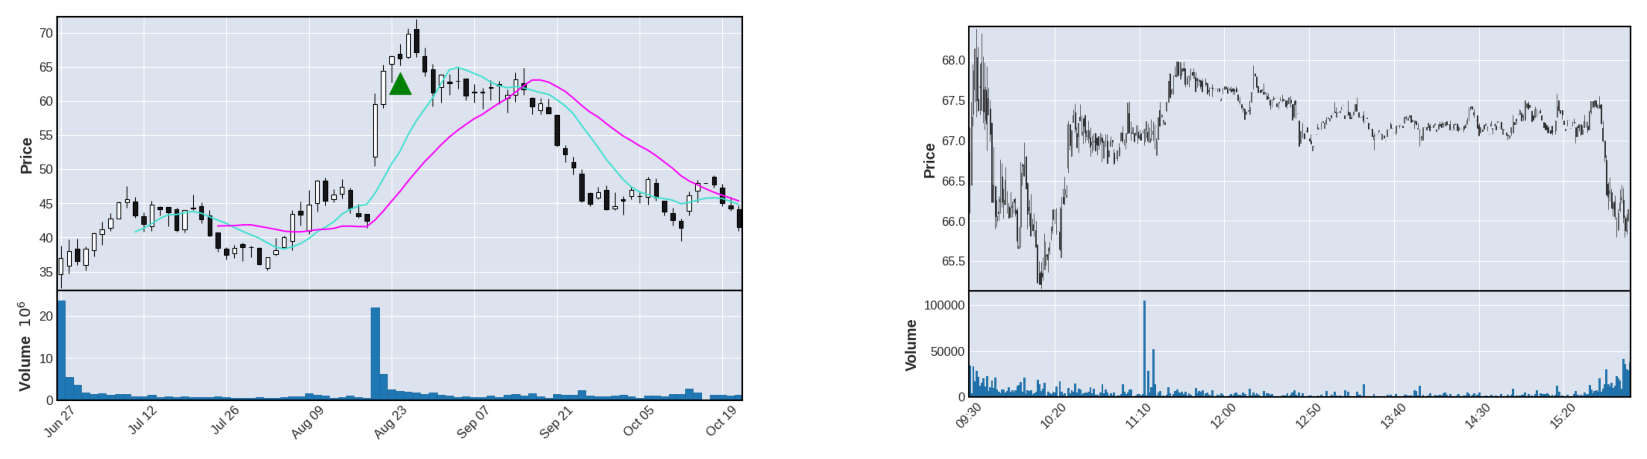

CAL (2022-08-23)
 open  high   low  close  volume
 30.5 31.13 29.32  29.79 1072268


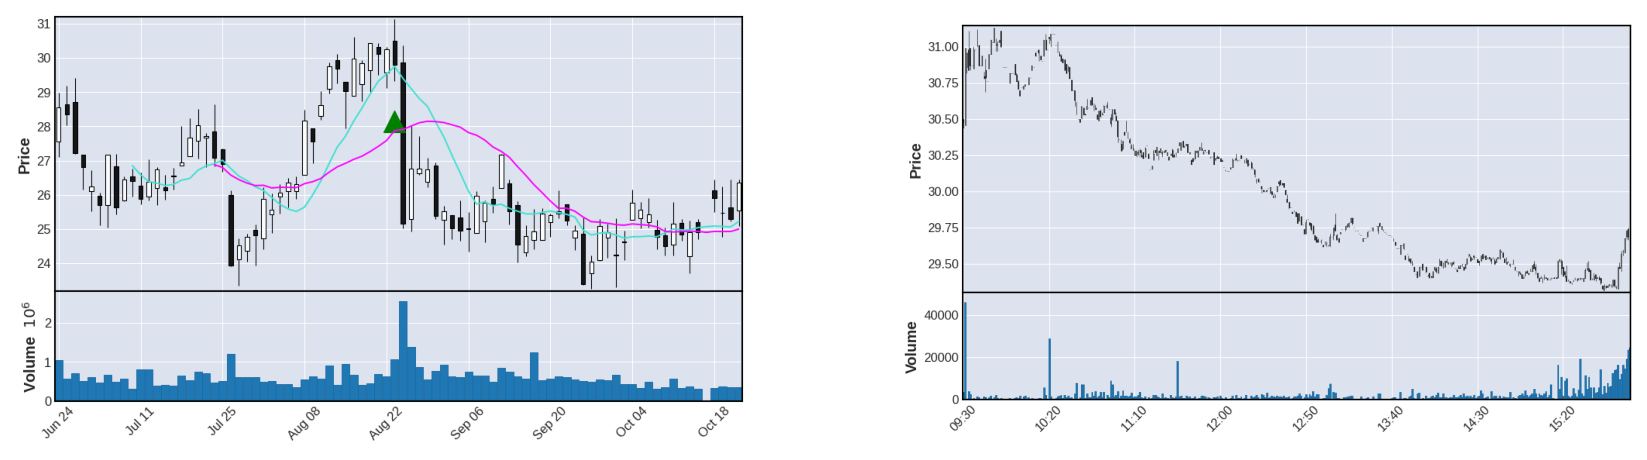

SBOW (2022-08-23)
 open  high   low  close  volume
49.27 49.91 46.38   46.6  400828


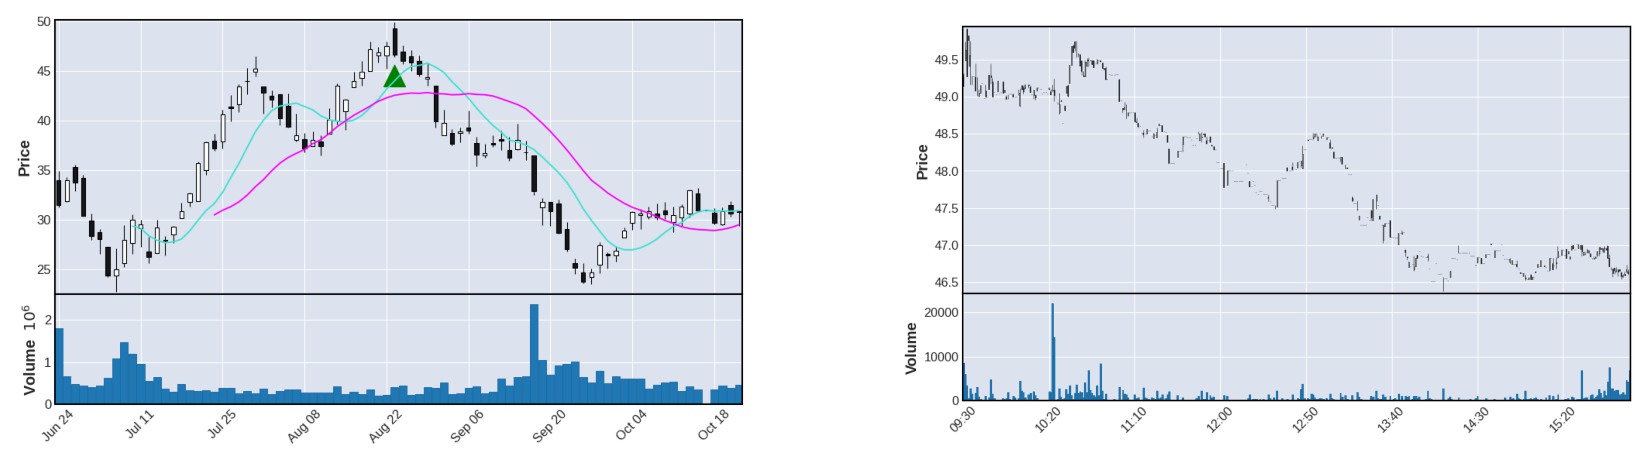

MICS (2022-08-22)
 open  high  low  close  volume
 10.0  10.1 7.19   7.67  219008


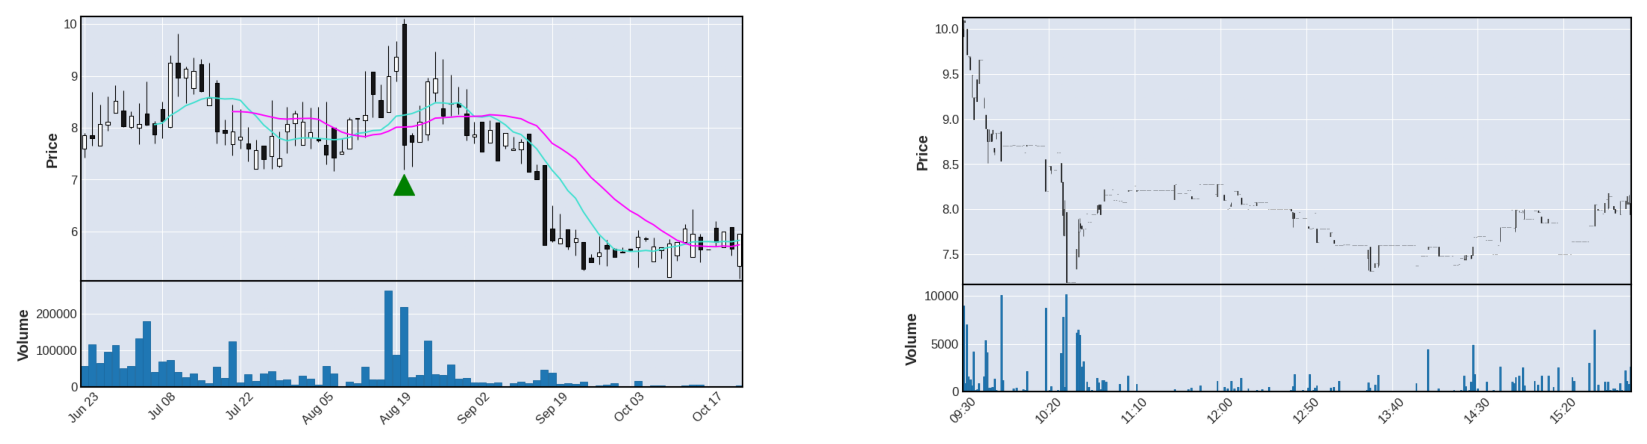

AR (2022-08-19)
 open  high   low  close  volume
41.97 43.19 41.75  41.87 5308211


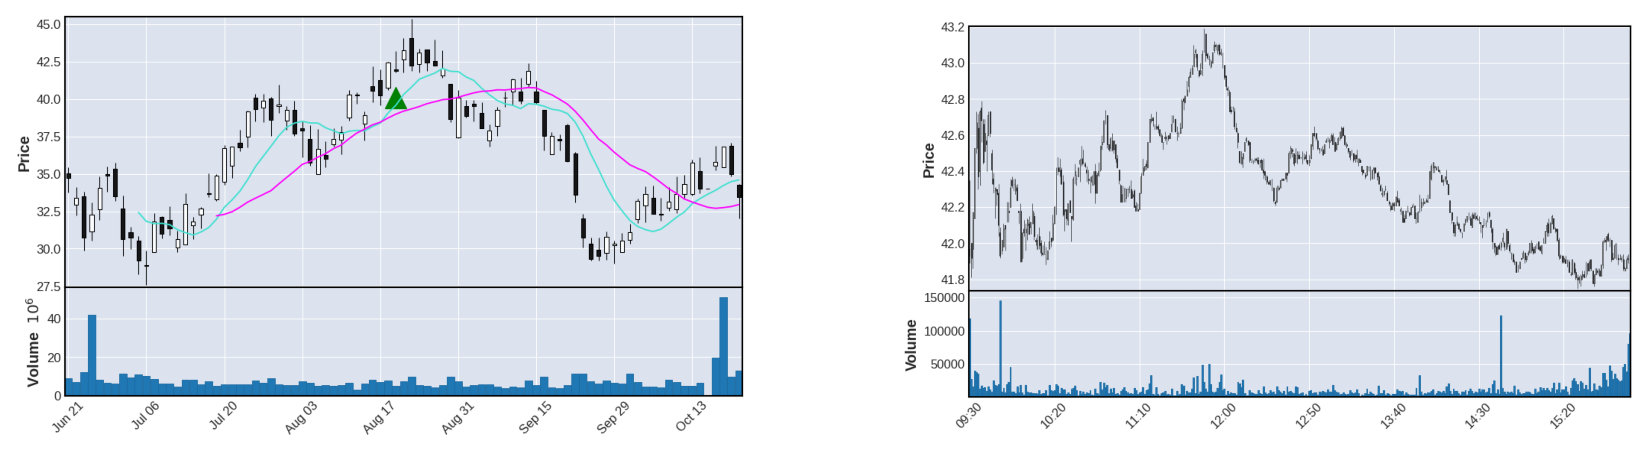

GSUN (2022-08-19)
 open  high  low  close  volume
76.97  95.0 42.2  50.85  318497


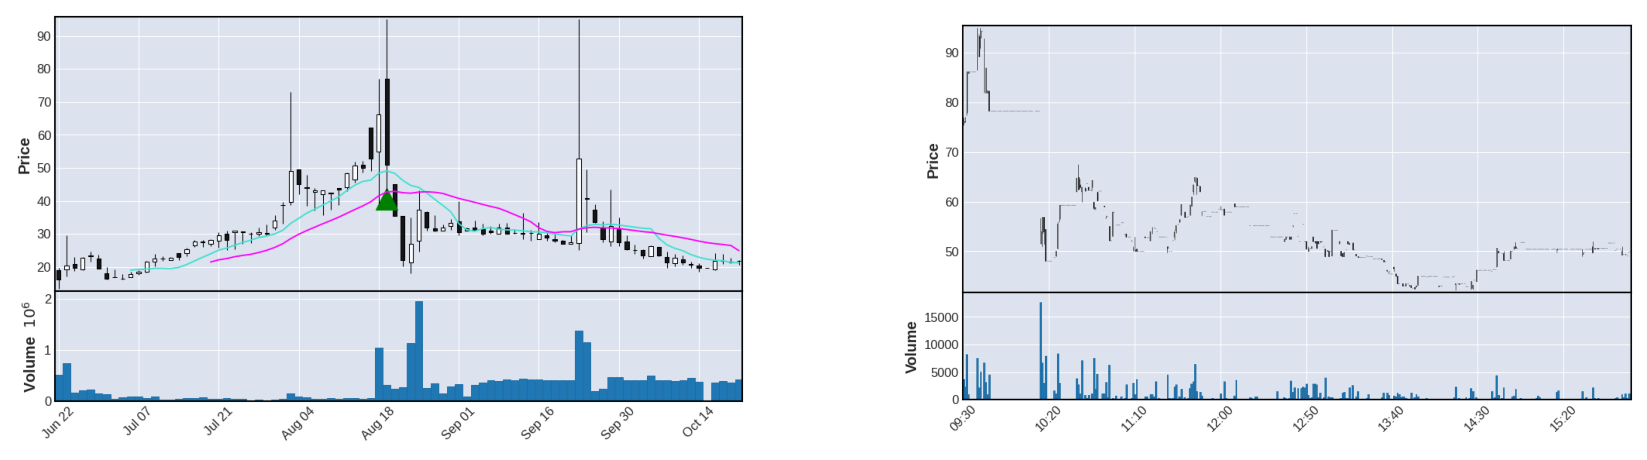

SJT (2022-08-19)
 open  high   low  close  volume
15.18 15.43 14.23  14.29 1844596
<class 'Exception'>
Request failed: http status 404
<Response [404]>
{"payload":[]}
INSW (2022-08-18)
 open  high   low  close  volume
30.11 30.61 29.67  29.89  689648


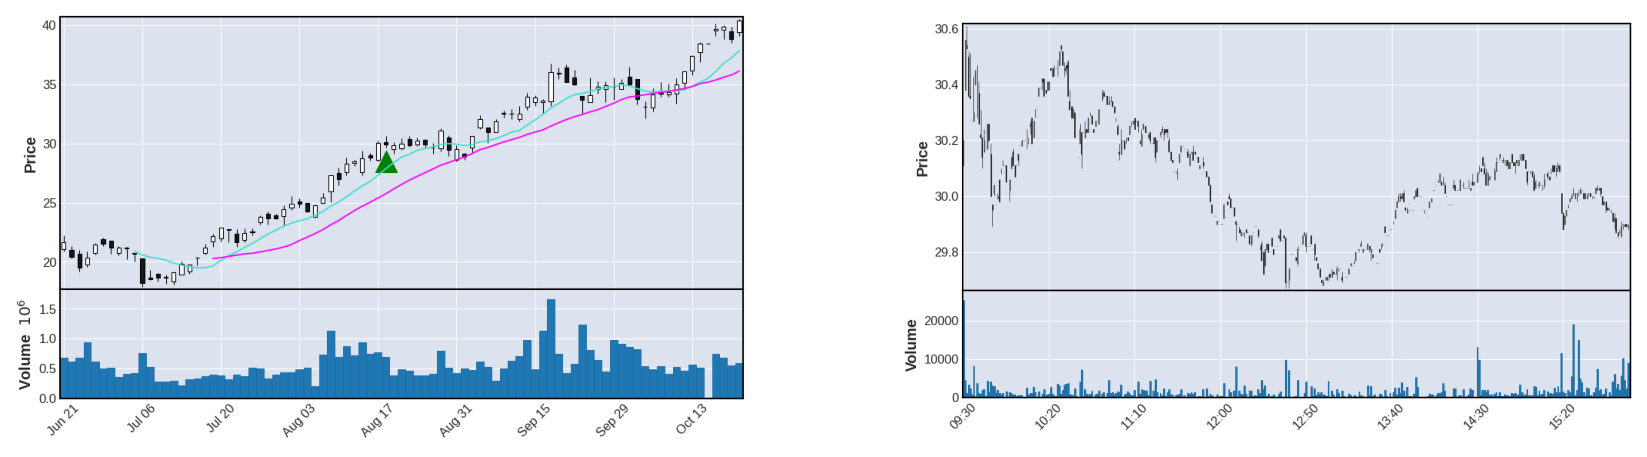

UNG (2022-08-18)
 open  high   low  close   volume
31.88 33.31 30.72  31.76 10308811


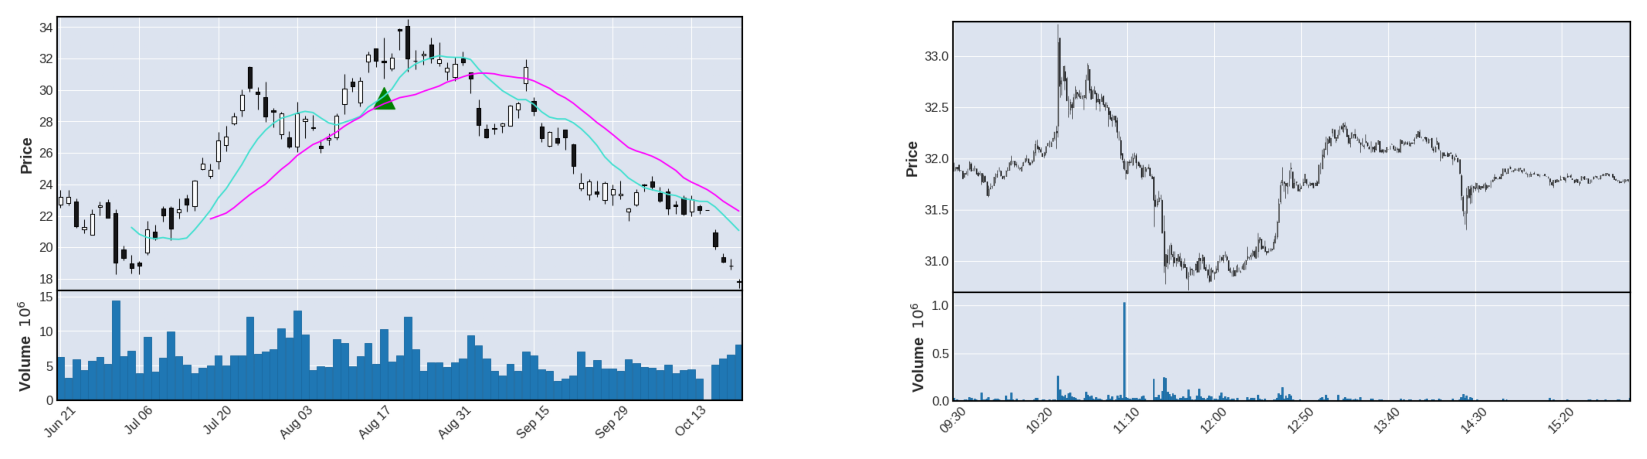

GSAT (2022-08-16)
 open  high  low  close  volume
 1.74  1.79  1.7   1.73 6163488


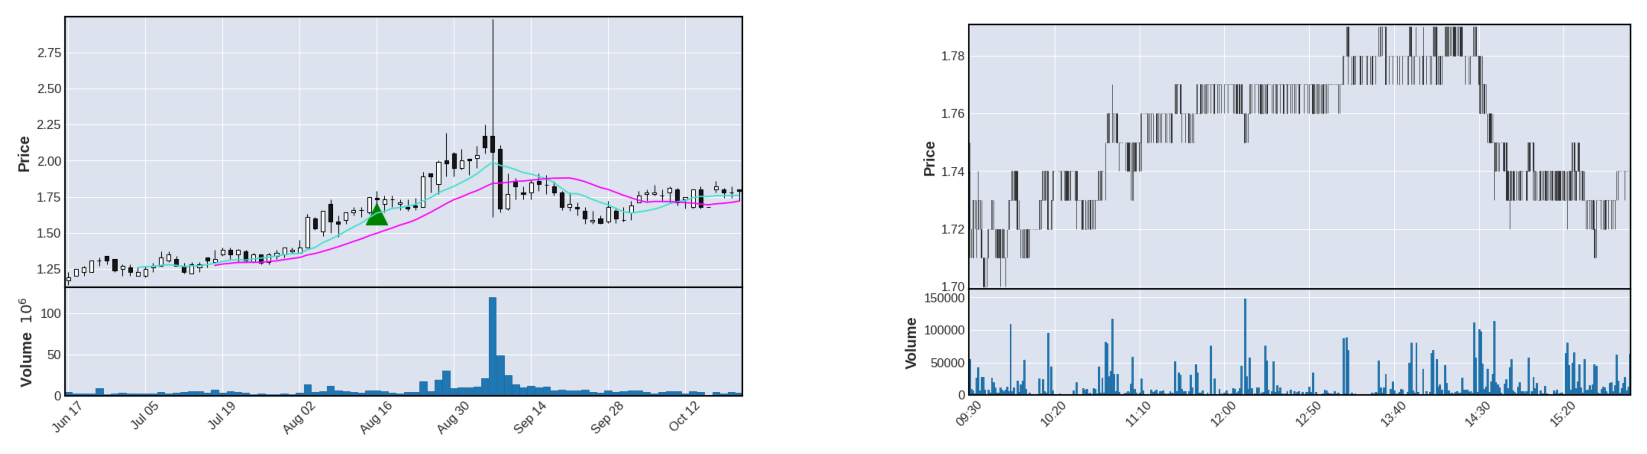

APLS (2022-08-11)
 open  high   low  close  volume
65.63  67.4 65.18  65.46  890847


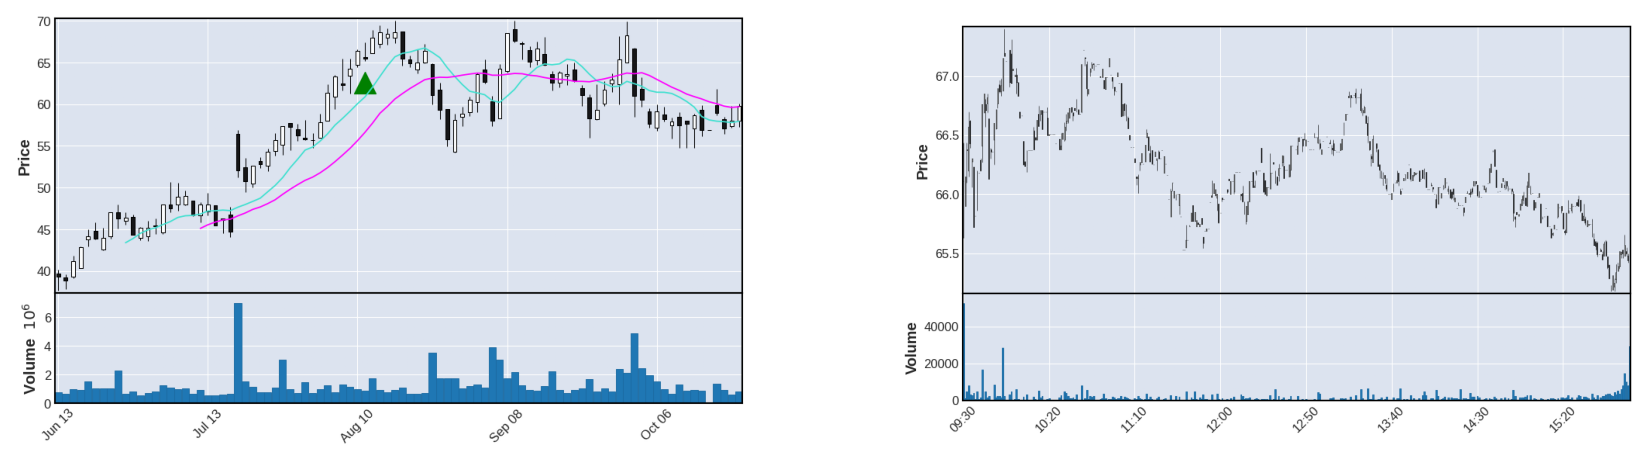

CLFD (2022-08-11)
  open   high   low  close  volume
117.96 119.97 114.9 115.53  404135


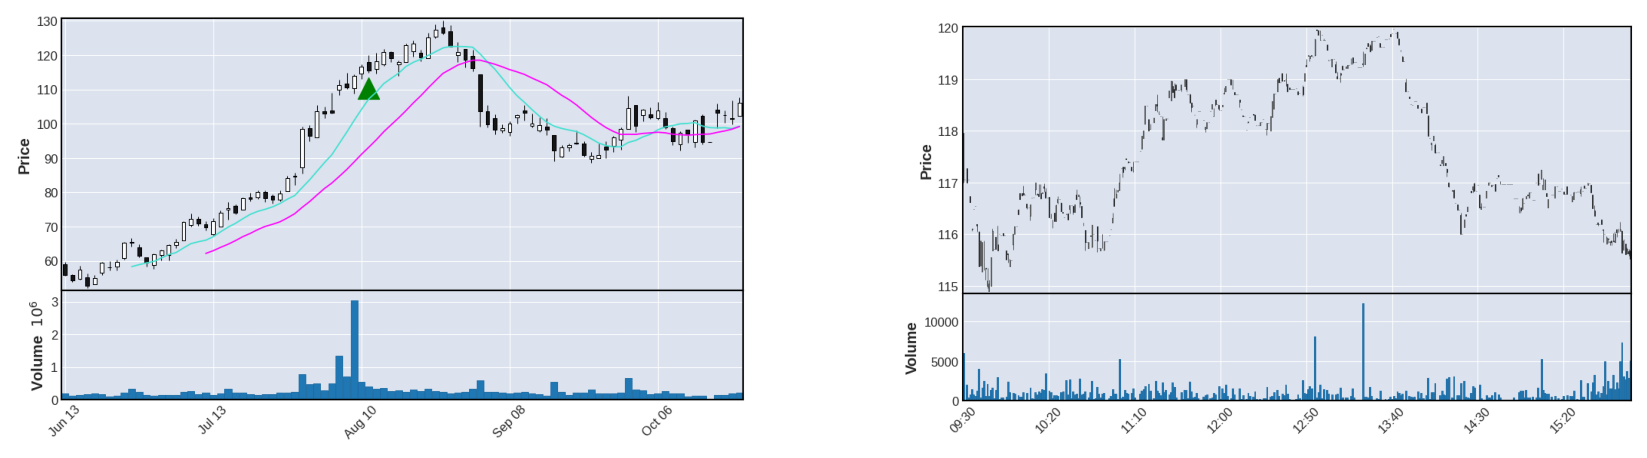

COGT (2022-08-11)
 open  high   low  close  volume
13.95 14.58 13.45  13.45  710799


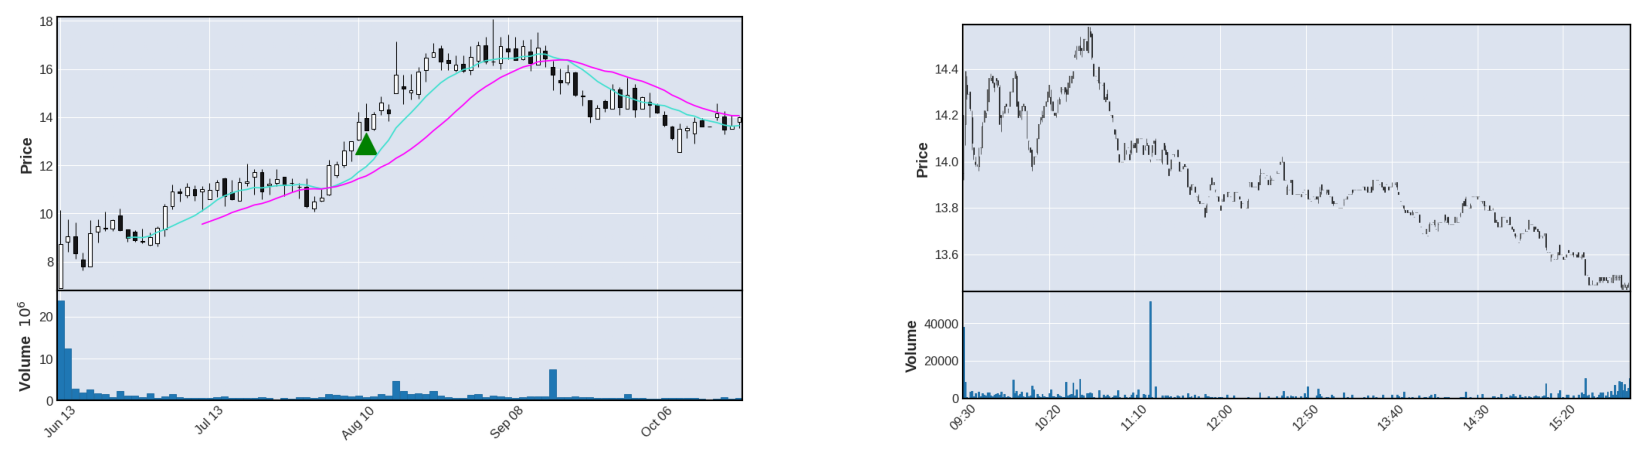

GTLS (2022-08-11)
  open   high   low  close  volume
211.54 214.14 202.9 203.31  434185


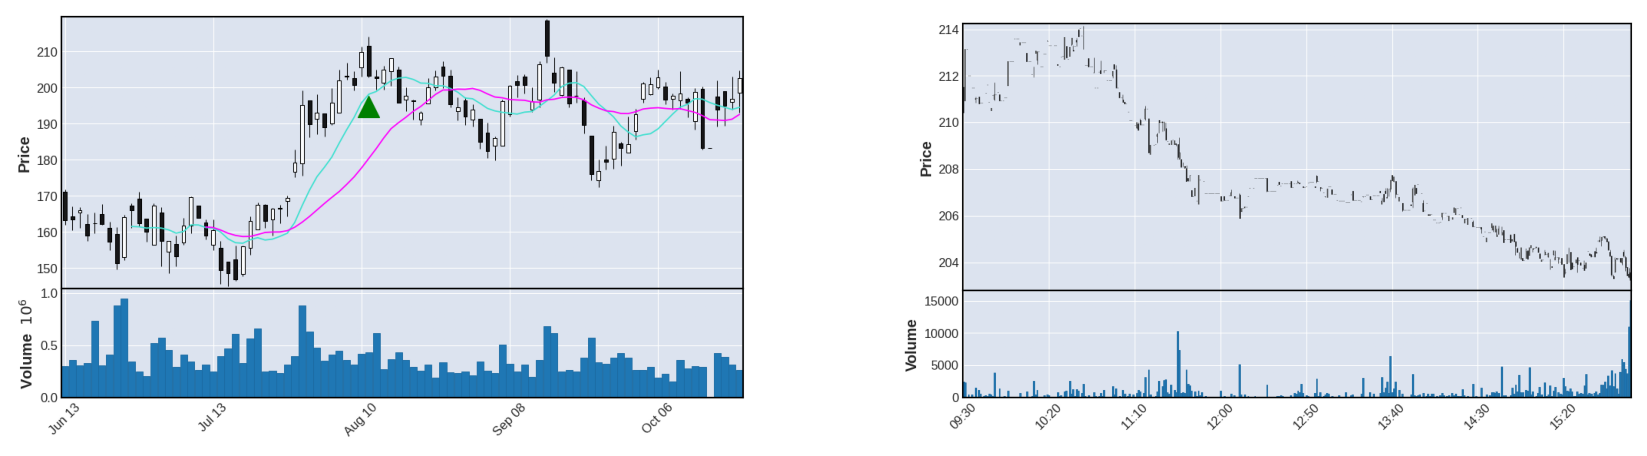

PRCT (2022-08-11)
 open  high  low  close  volume
44.49 46.62 43.6   43.7  233512


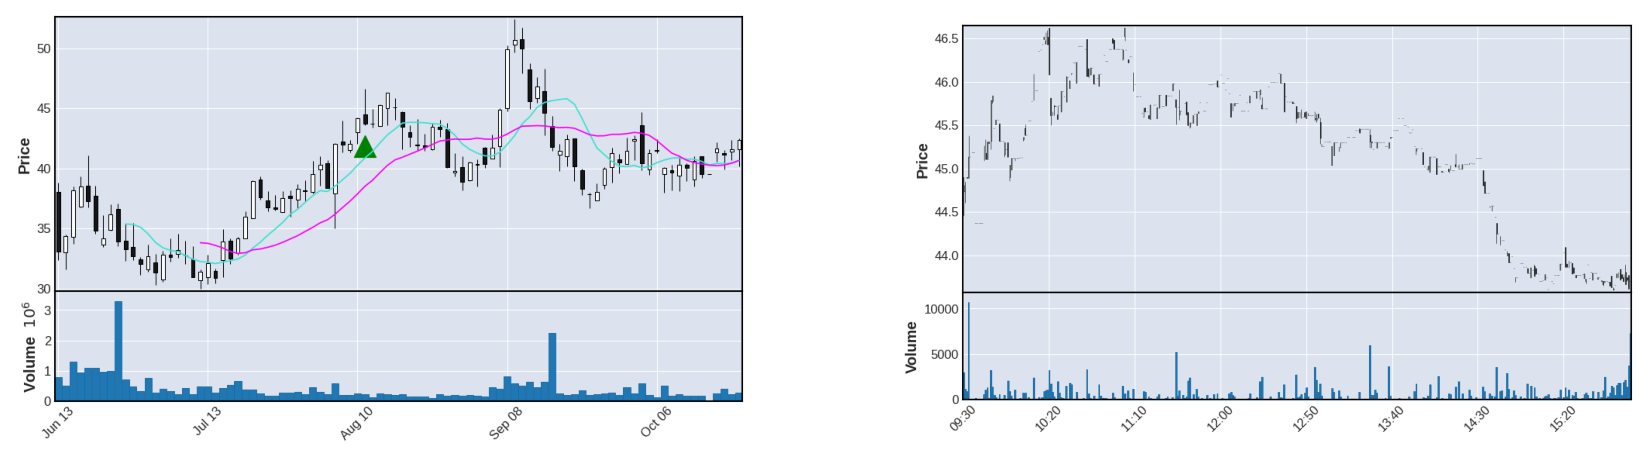

TCDA (2022-08-11)
 open  high   low  close  volume
13.34 13.79 12.89  13.13  407381


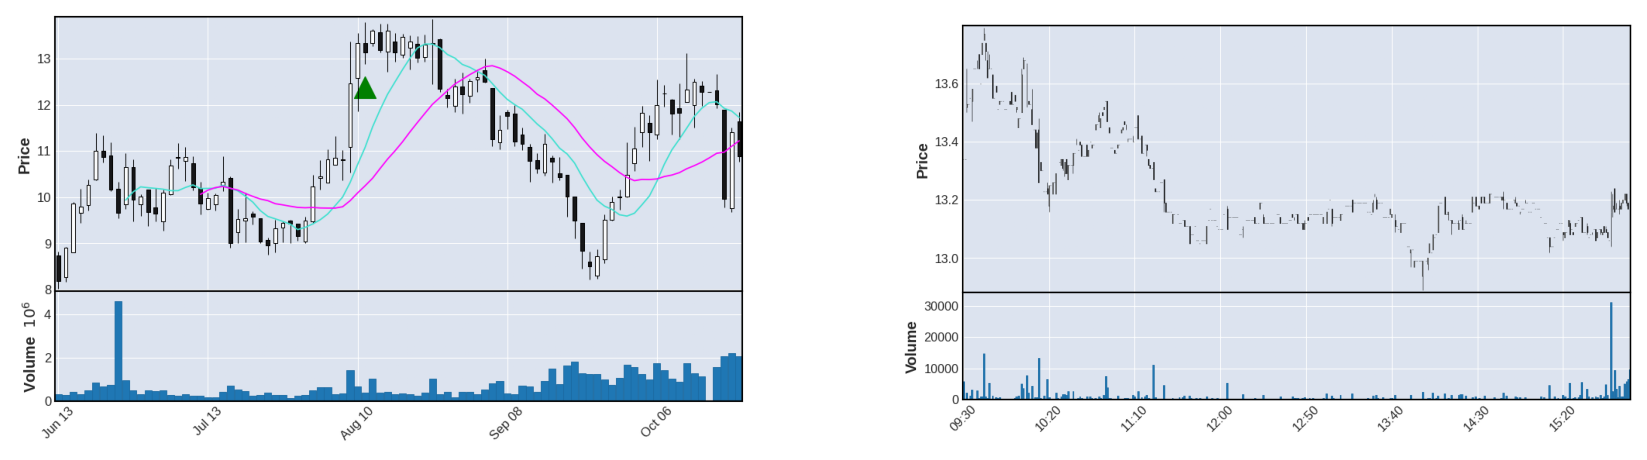

XENE (2022-08-11)
 open  high   low  close  volume
39.94 41.39 37.68  38.02  432854


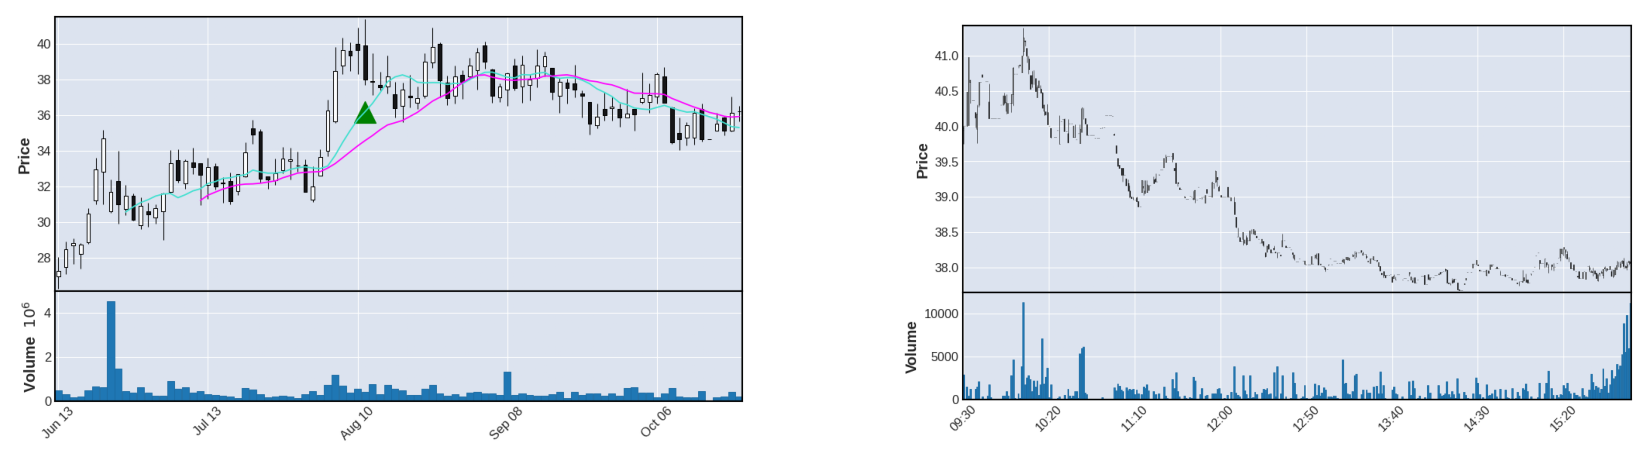

INSW (2022-08-10)
 open  high   low  close  volume
 27.5 27.94 26.45  26.96  701103


KeyboardInterrupt: ignored

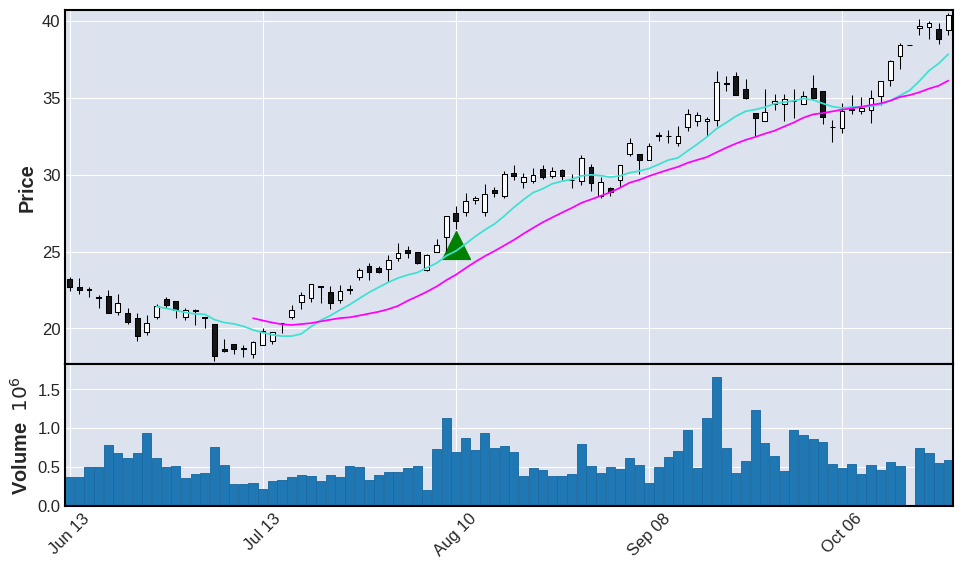

In [71]:
for index, row in df.iterrows():
    
    ######################################################
    # fetch daily
    ######################################################
    start = (row['patternTime'] + pd.DateOffset(days=-60)).strftime('%Y-%m-%d')
    end = (row['patternTime'] + pd.DateOffset(days=150)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/d?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)
    chartResponse = requests.get(url)
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)

    entry = row['patternTime'].strftime('%Y-%m-%d')
    buy = np.where(chartDf.index==entry, 1, np.nan) * 0.96 * chartDf['low']

    print(row['symbol'] + ' (' + row['patternTime'].strftime('%Y-%m-%d') + ')')
    print(chartDf[(chartDf.index == entry)].to_string(index=False))
    
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    imgDailyPlot = io.BytesIO()
    mpf.plot(chartDf[start:end], 
             type='candle', 
             volume=True, 
             mav=(10,20),
             tight_layout=True, 
             figratio=(16,9), 
             addplot=apd,
             savefig=imgDailyPlot)



    ######################################################
    # fetch intraday
    ######################################################
    start = (row['patternTime']).strftime('%Y-%m-%d')
    end = (row['patternTime']).strftime('%Y-%m-%d')
    url = baseurl + '/chart/' + row['symbol'] + '/1m?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)

    chartDf = None
    try:
      chartResponse = requests.get(url)
      if chartResponse.status_code != 200:
        raise Exception('Request failed: http status ' + str(chartResponse.status_code))
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      continue
          
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)

    imgIntradayPlot = io.BytesIO()
    mpf.plot(chartDf[start:end], 
             type='candle', 
             volume=True, 
             tight_layout=True, 
             figratio=(16,9),
             savefig=imgIntradayPlot)

    ######################################################
    # render candlestick & perf charts
    ######################################################
    # daily & intraday charts
    _ = imgDailyPlot.seek(0)
    _ = imgIntradayPlot.seek(0)
    img1 = m_img.imread(imgDailyPlot)
    img2 = m_img.imread(imgIntradayPlot)
    fig = plt.figure(figsize=(21,14))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()

    # plotPerformance(ticker)
